<a href="https://colab.research.google.com/github/knoppin1/DATA-606-Capstone/blob/main/ipynb/203_kmeans_wealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import pickle

In [2]:
# Read from pickle file
df = pd.read_pickle("./all_data_fips.pkl")
df.shape

(3112, 17)

In [3]:
df.head(3)

,FIPS,FIPS_Code,County,State_Abbr,State,Place,Land_Area,Population,Pop_Sq_Mile,Income,Confirmed,Cases_Sq_Mile,Deaths,Deaths_Sq_Mile,Vaccinated,Vax_Pct,Vax_Sq_Mile
0,2013,02013,Aleutians East Borough,AK,Alaska,"Aleutians East, Alaska, US",6981.94,3337,0,62537,369,0,3,0,2172,65.1,0
1,2016,02016,Aleutians West Census Area,AK,Alaska,"Aleutians West, Alaska, US",4390.28,5634,1,58008,721,0,1,0,2656,47.1,0
2,2020,02020,Anchorage Municipality,AK,Alaska,"Anchorage, Alaska, US",1704.68,288000,168,70145,31058,18,179,0,126221,43.8,74


In [4]:
df.describe()

,FIPS,Land_Area,Population,Pop_Sq_Mile,Income,Confirmed,Cases_Sq_Mile,Deaths,Deaths_Sq_Mile,Vaccinated,Vax_Pct,Vax_Sq_Mile
count,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000
mean,30282.262211,1106.374479,1.049407e+05,270.714332,45955.784062,1.061510e+04,26.421594,190.291774,0.430591,4.015677e+04,30.457584,105.849936
std,15126.815912,3610.275409,3.347700e+05,1782.779788,13144.549879,3.754849e+04,175.938025,727.551874,5.704471,1.501343e+05,15.123688,951.683493
min,1001.000000,2.000000,1.690000e+02,0.000000,19472.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,18170.500000,430.567500,1.094850e+04,16.750000,37962.000000,1.085000e+03,1.000000,20.000000,0.000000,2.198250e+03,23.500000,2.000000
50%,29160.000000,612.290000,2.607000e+04,45.000000,43431.500000,2.639000e+03,4.000000,51.000000,0.000000,6.654000e+03,31.700000,11.000000
75%,45049.500000,917.662500,6.831300e+04,118.250000,50732.750000,6.800000e+03,12.000000,121.000000,0.000000,2.162975e+04,40.500000,35.000000
max,56045.000000,145504.790000,1.003911e+07,71340.000000,229825.000000,1.247909e+06,6065.000000,24459.000000,197.000000,4.922209e+06,99.900000,42855.000000


In [5]:
florida_df = df.query("`State` == 'Florida'")
florida_df.shape

(67, 17)

In [6]:
features = [florida_df[['Income','Vax_Pct']]]
features

[     Income  Vax_Pct
 317   46690     48.2
 318   33254     18.8
 319   45690     31.8
 320   34179     23.6
 321   47911     44.1
 ..      ...      ...
 379   22440     21.3
 380   44180     41.2
 381   37660     29.7
 382   64481     31.2
 383   30268     20.3
 
 [67 rows x 2 columns]]

Reference: https://www.thiscodeworks.com/use-sklearn-standardscaler-only-on-certain-feature-columns-python/605cc55c3c8db10014203c0e

In [8]:
scaled_features = florida_df.copy()
 
col_names = ['Income','Vax_Pct']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features
scaled_features[col_names]

,Income,Vax_Pct
317,0.128578,1.151206
318,-0.687334,-1.652857
319,0.067852,-0.412965
320,-0.631162,-1.195051
321,0.202725,0.760163
...,...,...
379,-1.344023,-1.414416
380,-0.023843,0.483572
381,-0.419776,-0.613255
382,1.208951,-0.470191


In [9]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=0)

In [10]:
kmeans.fit(scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [11]:
# The lowest SSE (Sum of Squares Error) value
kmeans.inertia_

977788.4444444444

In [12]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 560.13333333,   50.33333333],
       [ 109.15555556,   10.06666667],
       [3560.        ,  300.        ],
       [1468.33333333,  170.33333333]])

In [13]:
# The number of iterations required to converge
kmeans.n_iter_

6

In [14]:
# Look at the label assignments
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 3, 1,
       1, 1, 1, 3, 1, 0, 0, 2, 0, 1, 1, 0, 3, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1], dtype=int32)

In [15]:
scaled_features['Label'] = labels
scaled_features[['Place','Income','Vax_Pct','Label']]

,Place,Income,Vax_Pct,Label
317,"Alachua, Florida, US",0.128578,1.151206,1
318,"Baker, Florida, US",-0.687334,-1.652857,1
319,"Bay, Florida, US",0.067852,-0.412965,1
320,"Bradford, Florida, US",-0.631162,-1.195051,1
321,"Brevard, Florida, US",0.202725,0.760163,0
...,...,...,...,...
379,"Union, Florida, US",-1.344023,-1.414416,1
380,"Volusia, Florida, US",-0.023843,0.483572,0
381,"Wakulla, Florida, US",-0.419776,-0.613255,1
382,"Walton, Florida, US",1.208951,-0.470191,1


In [16]:
#filter rows of original data
filtered_label0 = scaled_features[scaled_features.Label == 0]
filtered_label0.shape

(15, 18)

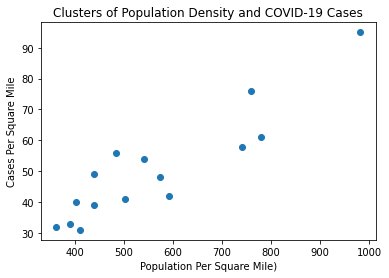

In [17]:
#plotting the results
plt.scatter(filtered_label0['Pop_Sq_Mile'], filtered_label0['Cases_Sq_Mile'])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.title('Clusters of Population Density and COVID-19 Cases')
plt.xlabel('Population Per Square Mile)')
plt.ylabel('Cases Per Square Mile')
plt.show()

In [18]:
# X = scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']]
X = florida_df[col_names]

Reference: https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

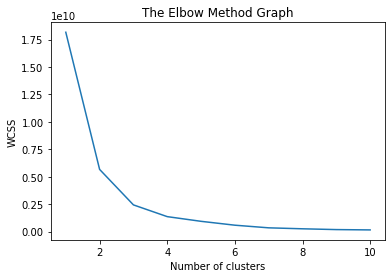

In [19]:
# Using the elbow method to find out the optimal number of clusters. 
wcss=[]

# Loop ten times to:
#  - fit the k-means algorithm to data 
#  - use kmean++ random initialization method 
#  - allow for a maximum of 300 iterations to find final clusters 
#  - run the algorithm for 10 different initial centroids 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(X)

    # Compute the WCSS (within cluster sum of squares) and append it to a WCSS list.
    wcss.append(kmeans.inertia_)

# Plot the elbow graph using the WCSS list.
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Four (4) clusters seems to be the optimum number of clusters because that is where the elbow curves

In [20]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
X['Label'] = kmeans.fit_predict(X)
X['Label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


317    3
318    1
319    3
320    1
321    3
      ..
379    1
380    3
381    1
382    2
383    1
Name: Label, Length: 67, dtype: int32

In [22]:
kmeans.cluster_centers_

array([[9.00248000e+04, 4.93400000e+01],
       [3.27066875e+04, 2.81375000e+01],
       [6.57965000e+04, 4.35250000e+01],
       [4.71708846e+04, 4.22884615e+01]])

In [23]:
X[X.Label==2][col_names]

,Income,Vax_Pct
361,61329,40.1
372,66878,52.7
374,70498,50.1
382,64481,31.2


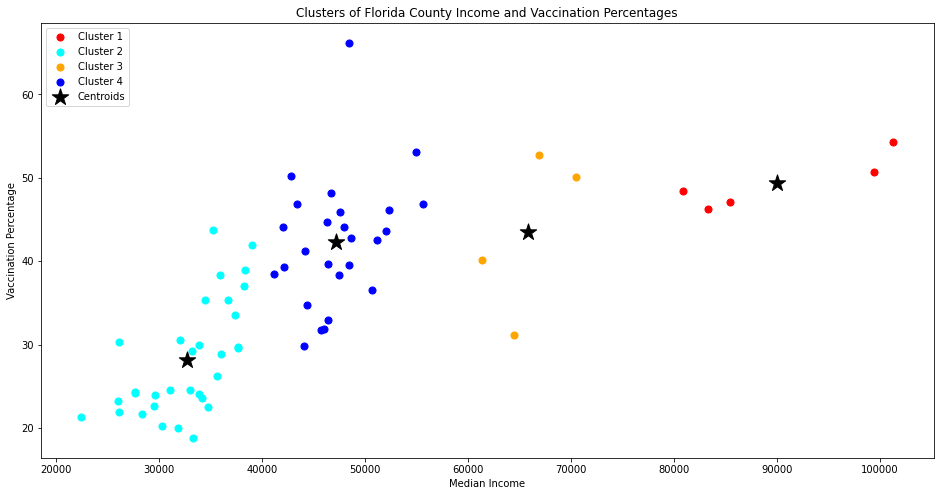

In [25]:
fig= plt.figure(figsize=(16,8))
plt.scatter(X[X.Label==0]['Income'], X[X.Label==0]['Vax_Pct'], s=50, c='red', label ='Cluster 1')
plt.scatter(X[X.Label==1]['Income'], X[X.Label==1]['Vax_Pct'], s=50, c='cyan', label ='Cluster 2')
plt.scatter(X[X.Label==2]['Income'], X[X.Label==2]['Vax_Pct'], s=50, c='orange', label ='Cluster 3')
plt.scatter(X[X.Label==3]['Income'], X[X.Label==3]['Vax_Pct'], s=50, c='blue', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids', marker='*')
#plt.xlim(0,4000)
#plt.ylim(0,350)
plt.title('Clusters of Florida County Income and Vaccination Percentages')
plt.xlabel('Median Income')
plt.ylabel('Vaccination Percentage')
plt.legend(loc='upper left')
plt.show()

In [ ]:
X[X.Label==2]['Pop_Sq_Mile']

368    3560
Name: Pop_Sq_Mile, dtype: int64